In [ ]:
import numpy as np, matplotlib.pyplot as plt, scienceplots
# 使用Science风格的配置文件
plt.style.use('science')

In [ ]:
class Schrodinger:
    def __init__(self, potential_func, mass = 1, hbar = 1, xmin = -5, xmax = 5, ninterval = 1000):
        self.x = np.linspace(xmin, xmax, ninterval)    
        self.U = np.diag(potential_func(self.x), 0)        
        self.Lap = self.laplacian(ninterval)        
        self.H = - hbar**2 / (2*mass) * self.Lap + self.U       
        self.eigE, self.eigV = self.eig_solve()
            
        
    def laplacian(self, N):
        '''构造二阶微分算子：Laplacian'''
        dx = self.x[1] - self.x[0]
        return 1/dx**2*(-2 * np.diag(np.ones((N)), 0) + np.diag(np.ones((N-1)), 1) + np.diag(np.ones((N-1)), -1))
    
    def eig_solve(self):
        '''解哈密顿矩阵的本征值，本征向量；并对本征向量排序'''
        w, v = np.linalg.eig(self.H)  
        idx_sorted = np.argsort(w)     
        return w[idx_sorted], v[:, idx_sorted]
    
    def wave_func(self, n=0):
        return self.eigV[:, n]

    def eigen_value(self, n=0):
        return self.eigE[n]
    
    def check_eigen(self, n=7):
        '''check wheter H|psi> = E |psi> '''
        with plt.style.context(["science", "ieee", "no-latex"]):
            HPsi = np.dot(self.H, self.eigV[:, n])
            EPsi = self.eigE[n] * self.eigV[:, n]
            plt.plot(self.x, HPsi, label=r'$H|\psi_{%s} \rangle$'%n)
            plt.plot(self.x, EPsi, '-.', label=r'$E |\psi_{%s} \rangle$'%n)
            plt.legend(loc='upper right')
            plt.xlabel(r'$x$')
            plt.ylim(EPsi.min(), EPsi.max() * 1.6)
            plt.show()
            
    def plot_density(self, n=7):
        with plt.style.context(["science", "ieee", "no-latex"]):
            rho = self.eigV[:, n] * self.eigV[:, n]
            plt.plot(self.x, rho)
            plt.title(r'$E_{%s}=%.2f$'%(n, self.eigE[n]))
            plt.ylabel(r'$\rho_{%s}(x)=\psi_{%s}^*(x)\psi_{%s}(x)$'%(n, n, n))
            plt.xlabel(r'$x$')
            plt.show()
            
    def plot_potential(self):
        with plt.style.context(["science", "ieee", "no-latex"]):
            plt.plot(self.x, np.diag(self.U))
            plt.ylabel(r'potential')
            plt.xlabel(r'$x$')
            plt.show()

In [ ]:
# 定义谐振子势
def harmonic_potential(x, k=100):
    return 0.5 * k * x**2

# 创建谐振子势下的薛定谔方程
schro_harmonic = Schrodinger(harmonic_potential)
# schro_harmonic.plot_potential()

In [ ]:
schro_harmonic.check_eigen(n=1)

In [ ]:
schro_harmonic.eigE

In [ ]:
energyState = schro_harmonic.eigE
with plt.style.context(["science", "ieee", "no-latex"]):
    fig, ax = plt.subplots()
    # print('1')
    ax.plot(range(1, len(energyState) + 1), energyState)
    plt.show()

# 氢原子电子能级

In [45]:
def energyStatePlot():
    h :float = 6.626E-34
    m0 = 9.109E-31
    epsilon0 = 8.85E-12
    q = 1.6E-19

    n = np.arange(1, 10, 0.1)

    En = -m0 * q**3/(8 * epsilon0**2 * h**2)/n**2

    with plt.style.context(["science", "ieee", "no-latex"]):
        fig, ax = plt.subplots()
        ax.plot(n, En)
        plt.show()
    return En

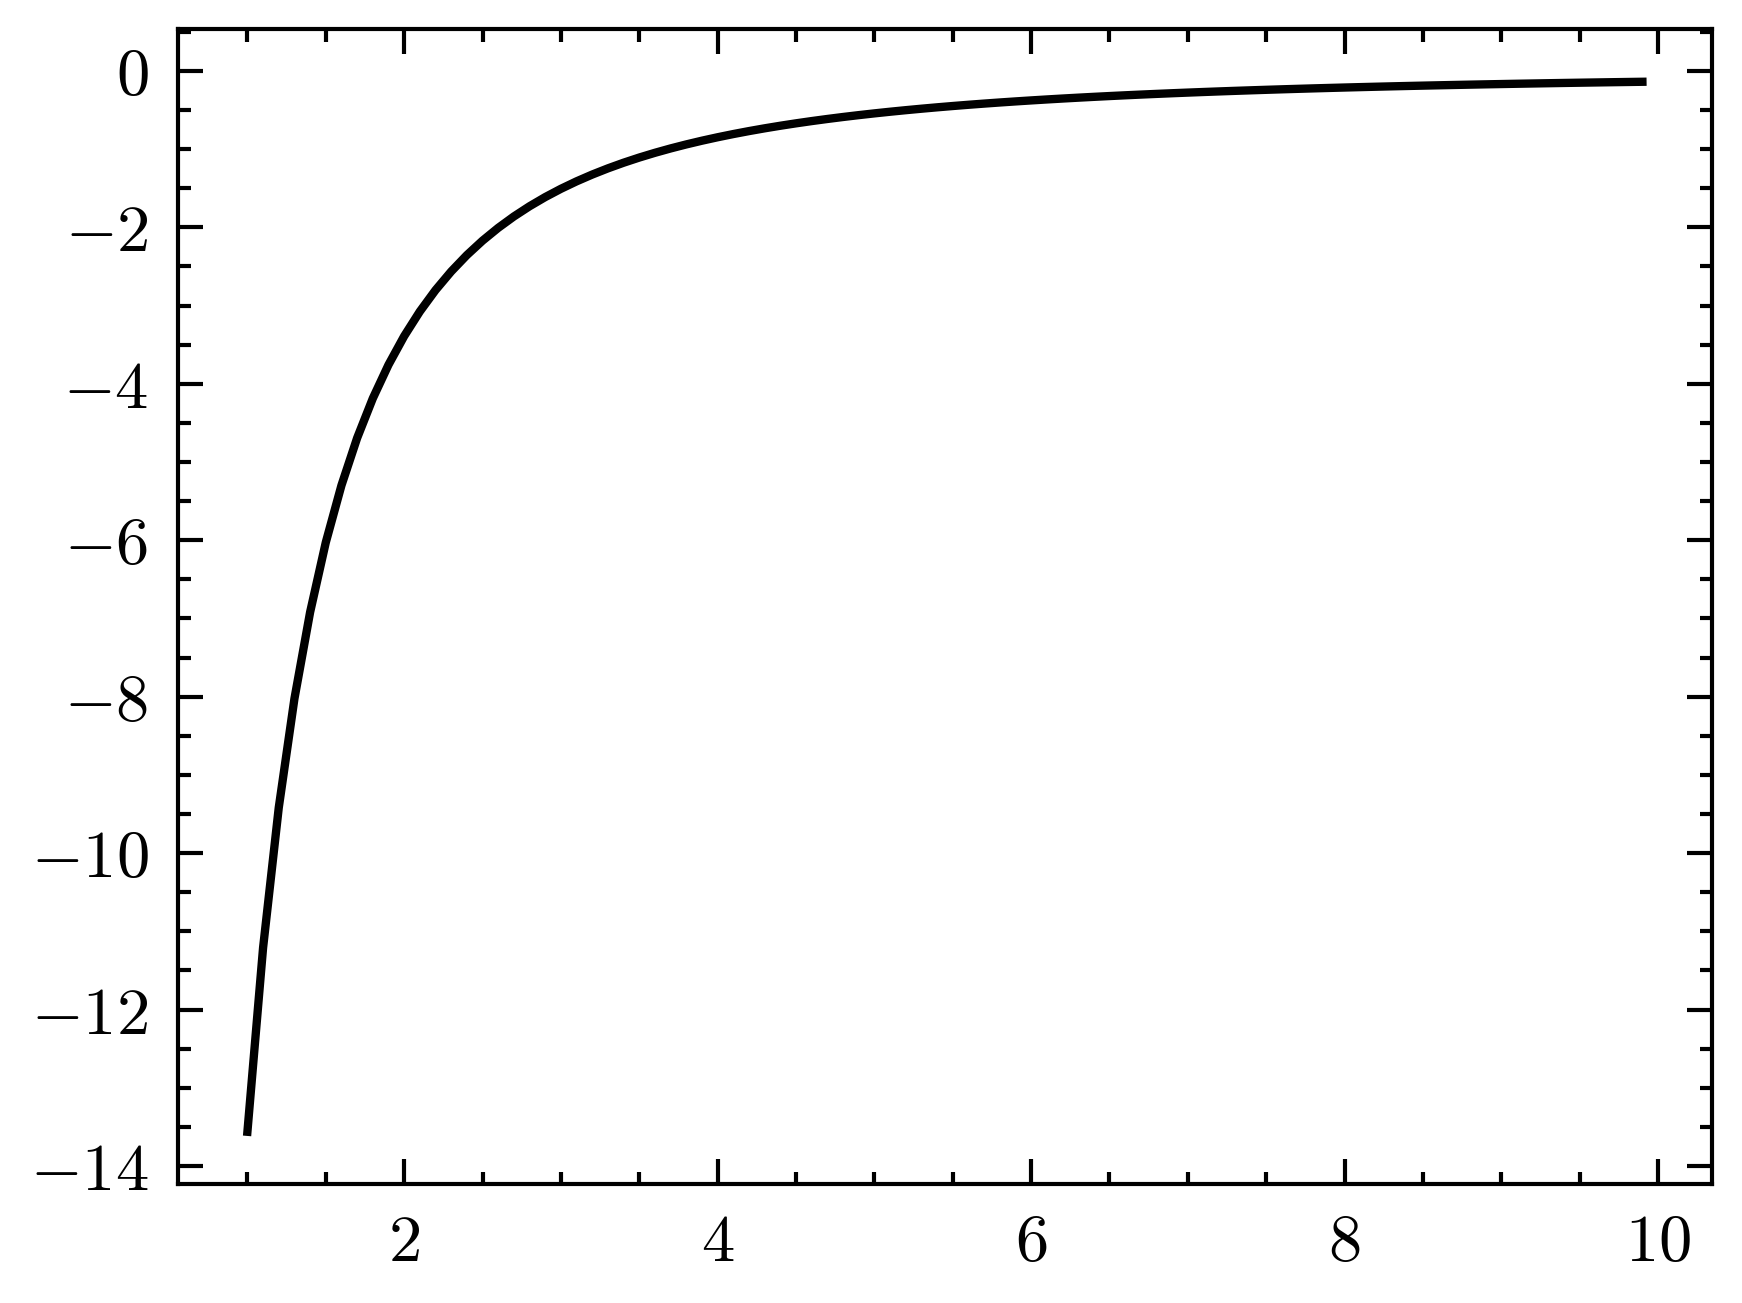

np.float64(-13.56285936626102)

In [46]:
En = energyStatePlot()
En[0]

In [50]:
import matplotlib.pyplot as plt
import numpy as np

xmin=-5 
xmax=5 
N=1001
x = np.linspace(xmin, xmax, N) 
dx = x[1] - x[0]

def potential(x, k=100):
 return 0.5 * k * x**2
 
V= np.diag(potential(x[1:-1]), 0)
L = np.diag(np.ones((N-2)), 0)/(dx**2) - 0.5 * np.diag(np.ones((N-3)), 1)/(dx**2) - 0.5 * np.diag(np.ones((N-3)), -1)/(dx**2)
H = V + L

w, v = np.linalg.eig(H)  
idx_sorted = np.argsort(w) 
eigE, eigV = w[idx_sorted], v[:, idx_sorted]

def plot_wavefunc(n):
    with plt.style.context(['science', 'ieee']):
        psi = np.zeros(N)     
        psi[1:-1] = eigV[:, n]
        plt.plot(x, -psi,label=r'$E_{%s}=%.3f\hbar \omega$'%(n, eigE[n]/10))
        plt.title(r'$E_{%s}=%.3f\hbar \omega$'%(n, eigE[n]/10))
 # plt.legend(loc='best')
        plt.xlabel(r'$x$')
        plt.show()

def plot_density(n):
    with plt.style.context(['science', 'ieee']):
        rho = np.zeros(N) 
        rho[1:-1] = eigV[:, n] * eigV[:, n]
        plt.plot(x, -psi,label=r'$E_{%s}=%.3f\hbar \omega$'%(n, eigE[n]/10))
        plt.title(r'$E_{%s}=%.3f\hbar \omega$'%(n, eigE[n]/10))
 # plt.legend(loc='best')
        plt.xlabel(r'$x$')

In [51]:
plot_wavefunc(1)

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1980x1500 with 1 Axes>